<a href="https://colab.research.google.com/github/Eduardo-Coyto/ML-UTEC-4Geeks/blob/Machine-Learning/Ej_de_ML_en_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split


In [2]:
df_raw = pd.read_csv("/content/heights.csv", index_col=0)

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 1 to 1050
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     1050 non-null   object 
 1   height  1050 non-null   float64
dtypes: float64(1), object(1)
memory usage: 24.6+ KB


In [4]:
df_raw.sample(10)

,sex,height
839,Male,70.0
288,Male,66.0
58,Male,67.0
155,Male,69.0
44,Male,60.0
459,Female,64.0
546,Male,66.0
661,Male,70.0
804,Male,67.0
578,Male,68.9


In [5]:
df_raw['height'] = df_raw['height']*2.54
df = df_raw.copy()


In [6]:
df.describe()

,height
count,1050.000000
mean,173.540454
std,10.359687
min,127.000000
25%,167.640000
50%,173.990000
75%,180.340000
max,210.000000


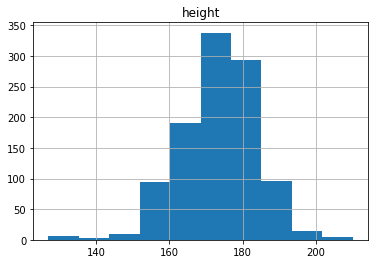

In [7]:
df.hist(bins=10)
plt.show()

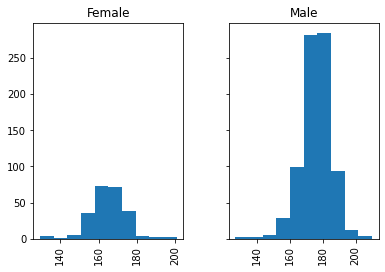

In [8]:
df.hist(by='sex', sharey= True) # pongo en la misma magnitud
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


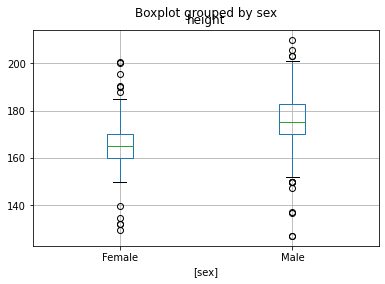

In [9]:
df.boxplot(by='sex')
plt.show()

## Vamos a pronosticar el sexo de la persona en base de la altura

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df['height'], df['sex'], test_size=0.25, random_state=53)

In [11]:
y_hat_guess = np.random.choice(['Female', 'Male'], len(X_train))
y_hat_guess

array(['Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female',
       'Female', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female',


## Quiero saber el Accuracy

In [12]:
np.mean(y_train == y_hat_guess) #np.mean comparación lógica de True = 1 False = 0

0.5171537484116899

cualquier modelo que haga debe estar por encima del %52,3 

In [13]:
df_train = pd.DataFrame({'height': X_train, 'sex': y_train})
df_train.groupby('sex')['height'].agg(['mean', 'std'])

,mean,std
sex,,
Female,164.466047,9.193325
Male,176.118109,9.540305


In [23]:
# 176.12 - (2*9.54)  tomamos a todos los Male +- 19.54 = 157.04 ---- 96% valores regla de decisión

y_hat_sd = df_train['height'].apply(lambda x : 'Male' if x > 157 else 'Famale' )

In [24]:
y_hat_sd

444    Male
463    Male
998    Male
686    Male
111    Male
       ... 
501    Male
663    Male
422    Male
886    Male
798    Male
Name: height, Length: 787, dtype: object

In [25]:
np.mean(y_train == y_hat_sd)

0.7458703939008895

la precisión subio al %74.58

In [26]:
my_list = []

for i in range (155, 179):
  y_hat_cut = df_train['height'].apply(lambda x : 'Male' if x > i else 'Female' )
  my_list.append(np.mean(y_train == y_hat_cut))
  
print(my_list)

[0.7776365946632783, 0.7763659466327827, 0.7738246505717916, 0.7890724269377383, 0.7928843710292249, 0.7928843710292249, 0.8094027954256671, 0.8081321473951716, 0.829733163913596, 0.8335451080050826, 0.8360864040660737, 0.8233799237611181, 0.8233799237611181, 0.8055908513341804, 0.795425667090216, 0.7814485387547649, 0.7382465057179162, 0.7331639135959339, 0.6823379923761118, 0.6683608640406608, 0.6632782719186785, 0.5972045743329097, 0.5921219822109276, 0.5184243964421855]


In [27]:
max(my_list)

0.8360864040660737

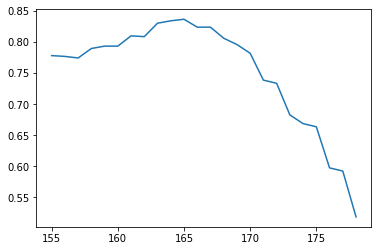

In [28]:
my_x = range(155,179)
plt.plot(my_x, my_list)
plt.show()

In [29]:
my_x[my_list.index(max(my_list))]

165

In [32]:
y_hat_best_cut = df_train['height'].apply(lambda x : 'Male' if x > 165 else 'Female' )

In [33]:
confusion_matrix(y_train, y_hat_best_cut)

array([[ 91,  88],
       [ 41, 567]])

In [37]:
len(X_test)

263

In [ ]:
y_hat_test_best_cut = ['Male' if i > 165 else 'Female' for i in X_test]
y_hat_test_best_cut

In [40]:
confusion_matrix(y_test, y_hat_test_best_cut)

array([[ 28,  31],
       [ 13, 191]])

In [41]:
pd.crosstab(np.array(y_test), np.array(y_hat_test_best_cut), rownames=['Actual'], colnames=['Prediction'])

Prediction,Female,Male
Actual,,
Female,28,31
Male,13,191


In [43]:
pd.DataFrame({'Actual': np.array(y_test), 'Prediction': np.array(y_hat_test_best_cut)}).head(10)

,Actual,Prediction
0,Male,Male
1,Female,Male
2,Male,Male
3,Female,Female
4,Male,Male
5,Male,Male
6,Male,Male
7,Male,Male
8,Male,Male
9,Male,Female
